# <span style="color:blue">  Esercitazione 5</span>

## Esercizio 5.1

L'obiettivo di questa esercitazione è quello di sfruttare l'algoritmo di Metropolis per campionare distribuzioni di probabilità tridimensionali come quelle ottenute a partire dalle funzioni d'onda che risolvono l'equazione di Schroedinger per l'atomo di idrogeno. In seguito possiamo calcolare il valore di aspettazione della distanza $r$ dell'elettrone dal centro dell'atomo.

Come prima cosa, campioniamo le distribuzioni di probabilità associate al ground state ($n=1$, $l=0$, $m=0$) e al primo stato eccitato nella configurazione $n=2$, $l=1$, $m=0$. Le rispettive funzioni d'onda, ottenute risolvendo il problema di Schroedinger in un potenziale coulombiano a simmetria sferica, sono
$$
\Psi_{1,0,0}(r,\theta,\phi) = \frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} \qquad \Psi_{2,1,0}(r,\theta,\phi) = 
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
da cui le densità di probabilità
$$
|\Psi_{1,0,0}(r,\theta,\phi)|^2 = \frac{a_0^{-3}}{\pi} e^{-2r/a_0} \qquad |\Psi_{2,1,0}(r,\theta,\phi)|^2 = 
\frac{a_0^{-5}}{32\pi} r^2 e^{-r/a_0} \cos^2(\theta)
$$
Ai fini dell'implementazione dell'algoritmo di Metropolis, lavoriamo in unità di distanza per cui $a_0=1$.

Per campionare le densità di probabilità con Metropolis adottiamo la regola dell'accettazione delle mosse al 50%. La dimensione dello step con cui proponiamo le nuove coordinate deve essere scelta a tal fine. A titolo di esempio, di seguito viene mostrato come la scelta di una dimensione eccessivamente piccola ($d=0.2$) porti ad accettare quasi tutte le mosse e ad avere alta autocorrelazione. Viceversa, la scelta di una dimensione degli step eccessivamente grande ($d=6.0$) porta a rigettare molte mosse, campionando la distribuzione con un basso livello di efficienza. Viene mostrato il caso del campionamento del ground state proponendo mosse a partire da una distribuzione uniforme.

Monitorando il livello di accettazione, si sono proposti come dimensioni degli step $d=1.2$ per il ground state con campionamento uniforme e $d=0.775$ con campionamento normale, mentre per il primo stato eccitato $d=3.0$ con campionamento uniforme e $d=1.8$ con campionamento normale.

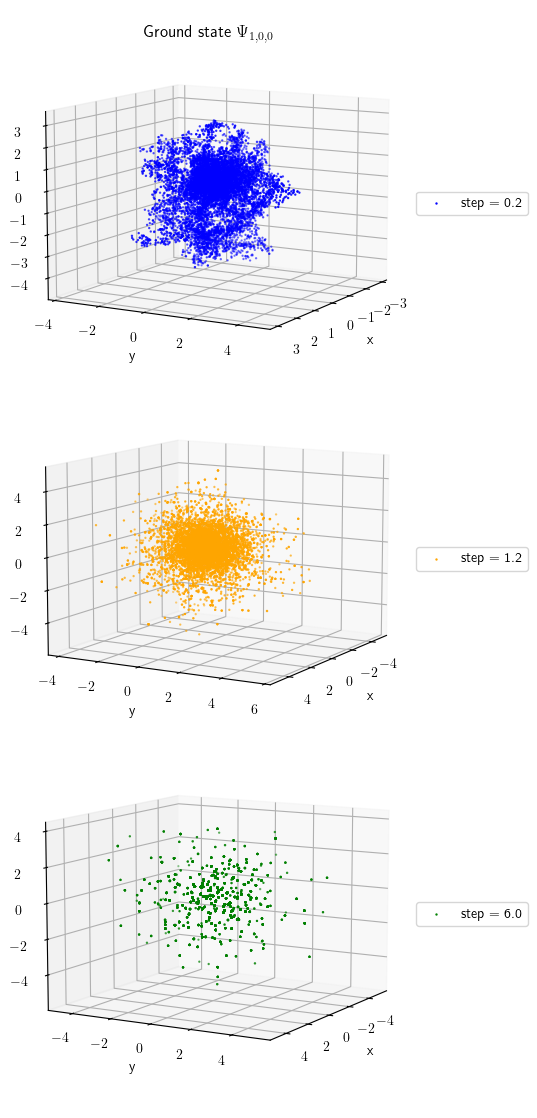

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Carica dati da file: coordinate x, y, z
data1 = np.loadtxt('positions_groundstate_smallstep.dat', skiprows=1) # Step piccolo
data2 = np.loadtxt('positions_groundstate_mediumstep.dat', skiprows=1) # Step medio
data3 = np.loadtxt('positions_groundstate_bigstep.dat', skiprows=1) # Step grande

# Plot grafico
fig = plt.figure(figsize=(5,15))
plt.rcParams['text.usetex'] = True
fig.suptitle("Ground state $\\Psi_{1,0,0}$", y=0.85)

# Primo grafico: step piccolo
ax1 = fig.add_subplot(311, projection='3d')
ax1.scatter(data1[:,1], data1[:,2], data1[:,3], c='blue', s=0.5, label='step = 0.2')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30) 
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Secondo grafico: step medio
ax2 = fig.add_subplot(312, projection='3d')
ax2.scatter(data2[:,1], data2[:,2], data2[:,3], c='orange', s=0.5, label='step = 1.2')

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(10, 30) 
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Terzo grafico: step grande
ax3 = fig.add_subplot(313, projection='3d')
ax3.scatter(data3[:,1], data3[:,2], data3[:,3], c='green', s=0.5, label='step = 6.0')

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.view_init(10, 30) 
ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.subplots_adjust(hspace=-0.2)
plt.show()

Un secondo punto da discutere è la scelta delle coordinate di partenza per campionare le distribuzioni di probabilità. Vale la regola di buon senso di scegliere un punto di partenza a cui sia associata una probabilità sufficientemente alta, ovvero un punto non eccessivamente "anomalo". In effetti, pur scegliendo delle coordinate molto distanti dai punti con maggior probabilità, l'algoritmo di Metropolis porta queste ad avvicinarsi sempre di più alla zona con associata una maggior probabilità. Questo è quanto viene mostrato di seguito per il caso del ground state.

Secondo quanto detto, si è scelto di campionare la densità di probabilità del ground state partendo da $(0,0,0)$, ovvero il punto con massima probabilità, e la densità di probabilità del primo stato eccitando scegliendo un punto sull'asse $z$ (assumendo che $\theta$ sia l'angolo di apertura rispetto a tale asse), per esempio partendo da $(0,0,5)$.

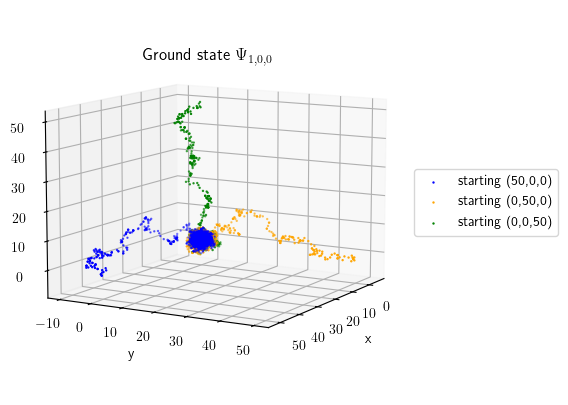

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Carica dati da file: coordinate x, y, z
data1 = np.loadtxt('positions_groundstate_starting50x.dat', skiprows=1) # Partendo da (50,0,0)
data2 = np.loadtxt('positions_groundstate_starting50y.dat', skiprows=1) # Partendo da (0,50,0)
data3 = np.loadtxt('positions_groundstate_starting50z.dat', skiprows=1) # Partendo da (0,0,50)

# Plot grafico
fig = plt.figure(figsize=(5,5))
plt.rcParams['text.usetex'] = True
fig.suptitle("Ground state $\\Psi_{1,0,0}$", y=0.8)

ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(data1[:,1], data1[:,2], data1[:,3], c='blue', s=0.5, label='starting (50,0,0)')
ax1.scatter(data2[:,1], data2[:,2], data2[:,3], c='orange', s=0.5, label='starting (0,50,0)')
ax1.scatter(data3[:,1], data3[:,2], data3[:,3], c='green', s=0.5, label='starting (0,0,50)')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30) 
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

Mostriamo infine le densità di probabilità campionate con l'algoritmo di Metropolis avendo generato un totale di $10^6$ punti.

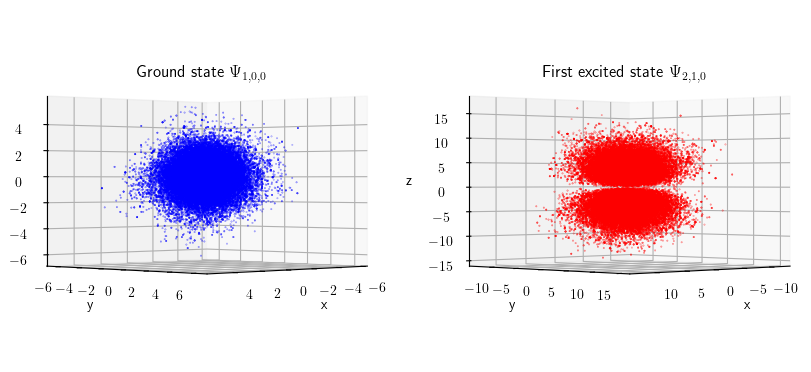

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Carica dati: coordinate x, y, z
data1 = np.loadtxt('orbital_groundstate.dat')
x1 = data1[:, 0]
y1 = data1[:, 1]
z1 = data1[:, 2]
data2 = np.loadtxt('orbital_firstexcited.dat')
x2 = data2[:, 0]
y2 = data2[:, 1]
z2 = data2[:, 2]

# Plot grafico
fig = plt.figure(figsize=(10,15))
plt.rcParams['text.usetex'] = True

# Grafico di sinistra: densità di probabilità ground state
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, y1, z1, c='blue', s=0.1)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(0, 45)
ax1.set_title("Ground state $\\Psi_{1,0,0}$", y=0.85)

# Grafico di destra: densità di probabilità primo stato eccitato
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x2, y2, z2, c='red', s=0.1)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(0, 45) 
ax2.set_title("First excited state $\\Psi_{2,1,0}$", y=0.85)

plt.show()

Il campionamento delle densità di probabilità permette di calcolare immediatamente il valore di aspettazione della distanza $r$ dell'elettrone dal centro dell'atomo sia nella configurazione di ground state che nel primo stato eccitato. Analiticamente, si ottiene
$$ 
\langle r \rangle _{100} = \frac{3}{2}a_0 \qquad \langle r \rangle _{210} = 5a_0
$$
Vengono generati $10^6$ punti organizzati in $N=10^2$ blocchi da $M=10^4$ punti ciascuno, di modo che il valore di aspettazione sia ottenuto dalla media a blocchi con associata l'incertezza statistica. Si confrontano quindi i risultati ottenuti in funzione del numero di blocchi considerati con il valore atteso dalla soluzione analitica.

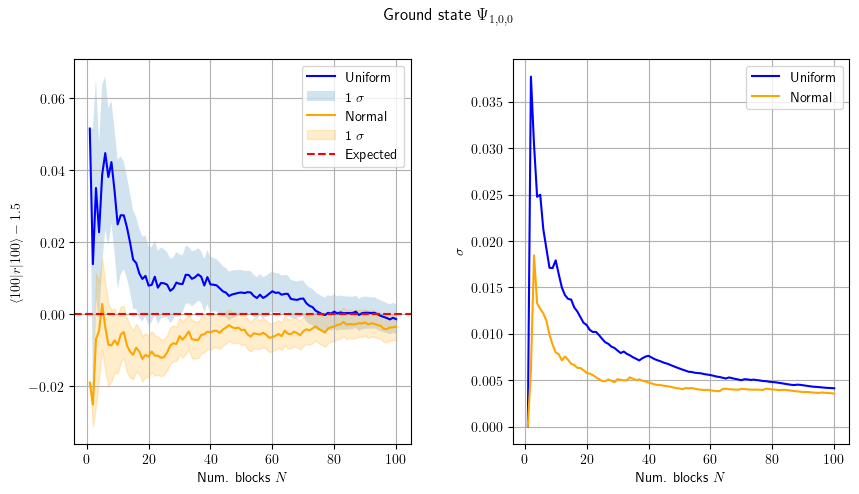

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Carica dati
data1 = np.loadtxt("Results_ex_5_ground_unif.out") # Metropolis con distribuzione uniforme
block1 = data1[:,0] # Numero blocco
ave1 = data1[:,1] # Valore di aspettazione con media a blocchi
err1 = data1[:,2] # Incertezza statistica
data2 = np.loadtxt("Results_ex_5_ground_norm.out") # Metropolis con distribuzione normale
block2 = data2[:,0] # Numero blocco
ave2 = data2[:,1] # Valore di aspettazione con media a blocchi
err2 = data2[:,2] # Incertezza statistica

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle("Ground state $\\Psi_{1,0,0}$")

# Grafico di sinistra: valore di aspettazione con errore
plt.subplot(1,2,1)

plt.plot(block1, ave1-1.5, color='blue', label='Uniform') # Metropolis con distribuzione uniforme
plt.fill_between(block1, ave1-err1-1.5, ave1+err1-1.5, alpha=0.2, label='1 $\\sigma$')

plt.plot(block2, ave2-1.5, color='orange', label='Normal') # Metropolis con distribuzione normale
plt.fill_between(block2, ave2-err2-1.5, ave2+err2-1.5, color='orange', alpha=0.2, label='1 $\\sigma$')

plt.axhline(0, color='red', linestyle='--', label='Expected') # Valore atteso

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\langle 100 | r | 100 \\rangle - 1.5$')
plt.legend()
plt.grid(True)

# Grafico di destra: incertezza statistica
plt.subplot(1,2,2)

plt.plot(block1, err1, color='blue', label='Uniform') # Metropolis con distribuzione uniforme
plt.plot(block2, err2, color='orange', label='Normal') # Metropolis con distribuzione normale

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\sigma$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

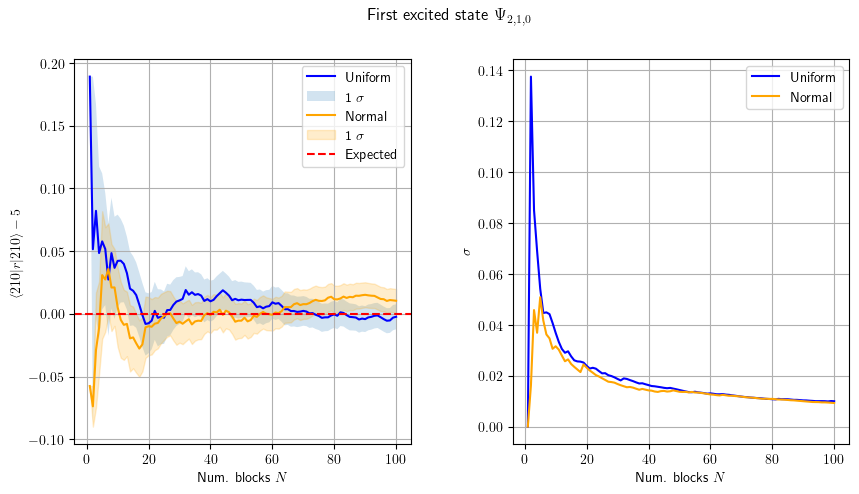

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Carica dati
data1 = np.loadtxt("Results_ex_5_firstexc_unif.out") # Metropolis con distribuzione uniforme
block1 = data1[:,0] # Numero blocco
ave1 = data1[:,1] # Valore di aspettazione con media a blocchi
err1 = data1[:,2] # Incertezza statistica
data2 = np.loadtxt("Results_ex_5_firstexc_norm.out") # Metropolis con distribuzione normale
block2 = data2[:,0] # Numero blocco
ave2 = data2[:,1] # Valore di aspettazione con media a blocchi
err2 = data2[:,2] # Incertezza statistica

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle("First excited state $\\Psi_{2,1,0}$")

# Grafico di sinistra: valore di aspettazione con errore
plt.subplot(1,2,1)

plt.plot(block1, ave1-5, color='blue', label='Uniform') # Metropolis con distribuzione uniforme
plt.fill_between(block1, ave1-err1-5, ave1+err1-5, alpha=0.2, label='1 $\\sigma$')

plt.plot(block2, ave2-5, color='orange', label='Normal') # Metropolis con distribuzione normale
plt.fill_between(block2, ave2-err2-5, ave2+err2-5, color='orange', alpha=0.2, label='1 $\\sigma$')

plt.axhline(0, color='red', linestyle='--', label='Expected') # Valore atteso

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\langle 210 | r | 210 \\rangle - 5$')
plt.legend()
plt.grid(True)

# Grafico di destra: incertezza statistica
plt.subplot(1,2,2)

plt.plot(block1, err1, color='blue', label='Uniform') # Metropolis con distribuzione uniforme
plt.plot(block2, err2, color='orange', label='Normal') # Metropolis con distribuzione normale

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\sigma$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()